# 8 Puzzle Solver With Graphviz

In [2]:
import copy
import random
import collections

GOAL = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]]

def show(board):
    for i in board:
        print(i)
    print()

def find_num(board, num):
    for i in range(3):
        for j in range(3):
            if board[i][j] == num:
                return i, j

def possible_move(board):
    pos = []
    i, j = find_num(board, 0)

    if i+1 <= 2:
        pos.append((i+1, j))
    if i-1 >= 0:
        pos.append((i-1, j))
    if j+1 <= 2:
        pos.append((i, j+1))
    if j-1 >= 0:
        pos.append((i, j-1))

    return pos

def move(board, pos):
    temp = copy.deepcopy(board)
    i, j = find_num(temp, 0)
    ii, jj = pos

    temp[i][j] = temp[ii][jj]
    temp[ii][jj] = 0

    return temp

def shuffle(board):
    temp = copy.deepcopy(board)
    for _ in range(100):
        pos = possible_move(temp)
        pos = random.choice(pos)
        temp = move(temp, pos)
    return temp

def manhattan(board):
    c = 0
    for i in range(3):
        for j in range(3):
            ii, jj = find_num(GOAL, board[i][j])
            c += abs(ii-i) + abs(jj-j)
    return c

def misplace(board):
    c = 0
    for i in range(3):
        for j in range(3):
            c += int(GOAL[i][j] != board[i][j])
    return c

def f_func(board):
    return manhattan(board) + misplace(board)

def solve(board):
    temp = copy.deepcopy(board)
    visited = []
    pq = [temp]
    history = []

    while 1:
        pq.sort(key=f_func)
        temp = pq[0]
        pq = pq[1:]

        if temp == GOAL:
            history.append([temp, -1])
            return history

        if temp in visited:
            continue

        visited.append(temp)

        pos = possible_move(temp)
        for p in pos:
            if move(temp, p) in visited:
                continue
            pq.append(move(temp, p))
            history.append([temp, move(temp, p)])

def backtrack(path, start):
    temp = path[-1][0]
    log = [temp]

    while temp != start:
        for p in path:
            if p[1] == temp:
                temp = p[0]
                log.append(temp)
                break

    return log[::-1]

In [3]:
# init board
board = copy.deepcopy(GOAL)
print("initial")
show(board)

# shuffle
board = shuffle(board)
unsolve_board = copy.deepcopy(board)
print("shuffled")
show(board)

initial
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]

shuffled
[2, 3, 7]
[1, 6, 8]
[0, 4, 5]



In [4]:
# solve
print("solving")
path = solve(board)

# show how to solve
log = backtrack(path, unsolve_board)
for i in log:
    show(i)

solving
[2, 3, 7]
[1, 6, 8]
[0, 4, 5]

[2, 3, 7]
[1, 6, 8]
[4, 0, 5]

[2, 3, 7]
[1, 6, 8]
[4, 5, 0]

[2, 3, 7]
[1, 6, 0]
[4, 5, 8]

[2, 3, 7]
[1, 0, 6]
[4, 5, 8]

[2, 3, 7]
[1, 5, 6]
[4, 0, 8]

[2, 3, 7]
[1, 5, 6]
[4, 8, 0]

[2, 3, 7]
[1, 5, 0]
[4, 8, 6]

[2, 3, 0]
[1, 5, 7]
[4, 8, 6]

[2, 0, 3]
[1, 5, 7]
[4, 8, 6]

[0, 2, 3]
[1, 5, 7]
[4, 8, 6]

[1, 2, 3]
[0, 5, 7]
[4, 8, 6]

[1, 2, 3]
[5, 0, 7]
[4, 8, 6]

[1, 2, 3]
[5, 7, 0]
[4, 8, 6]

[1, 2, 3]
[5, 7, 6]
[4, 8, 0]

[1, 2, 3]
[5, 7, 6]
[4, 0, 8]

[1, 2, 3]
[5, 0, 6]
[4, 7, 8]

[1, 2, 3]
[0, 5, 6]
[4, 7, 8]

[1, 2, 3]
[4, 5, 6]
[0, 7, 8]

[1, 2, 3]
[4, 5, 6]
[7, 0, 8]

[1, 2, 3]
[4, 5, 6]
[7, 8, 0]



In [5]:
print("total step : ", len(log))

total step :  21


In [6]:
from graphviz import Digraph

g = Digraph()

def cell3by3_black(name, ll):
    msg = "<"
    msg += """<table cellspacing="0">"""
    for i in range(3):
        msg += "<tr>"
        for j in range(3):
            msg += f"<td>{ll[i][j]}</td>"
        msg += "</tr>"
    msg += "</table>>"
    
    g.attr("node", shape="none", color="black")
    g.node(name, msg)
    
def cell3by3_blue(name, ll):
    msg = "<"
    msg += """<table cellspacing="0">"""
    for i in range(3):
        msg += "<tr>"
        for j in range(3):
            msg += f"<td>{ll[i][j]}</td>"
        msg += "</tr>"
    msg += "</table>>"
    
    g.attr("node", shape="none", color="blue")
    g.node(name, msg)

for i in log:
    cell3by3_blue(str(i), i)
    
for i in path:
    cell3by3_black(str(i[0]), i[0])
    if i != path[-1]:
        cell3by3_black(str(i[1]), i[1])
        
for i in path[:-1]:
    if i[0] in log:
        g.edge(str(i[0]), str(i[1]), color="black")
    else:
        g.edge(str(i[0]), str(i[1]), color="black")

g.view()

'Digraph.gv.pdf'

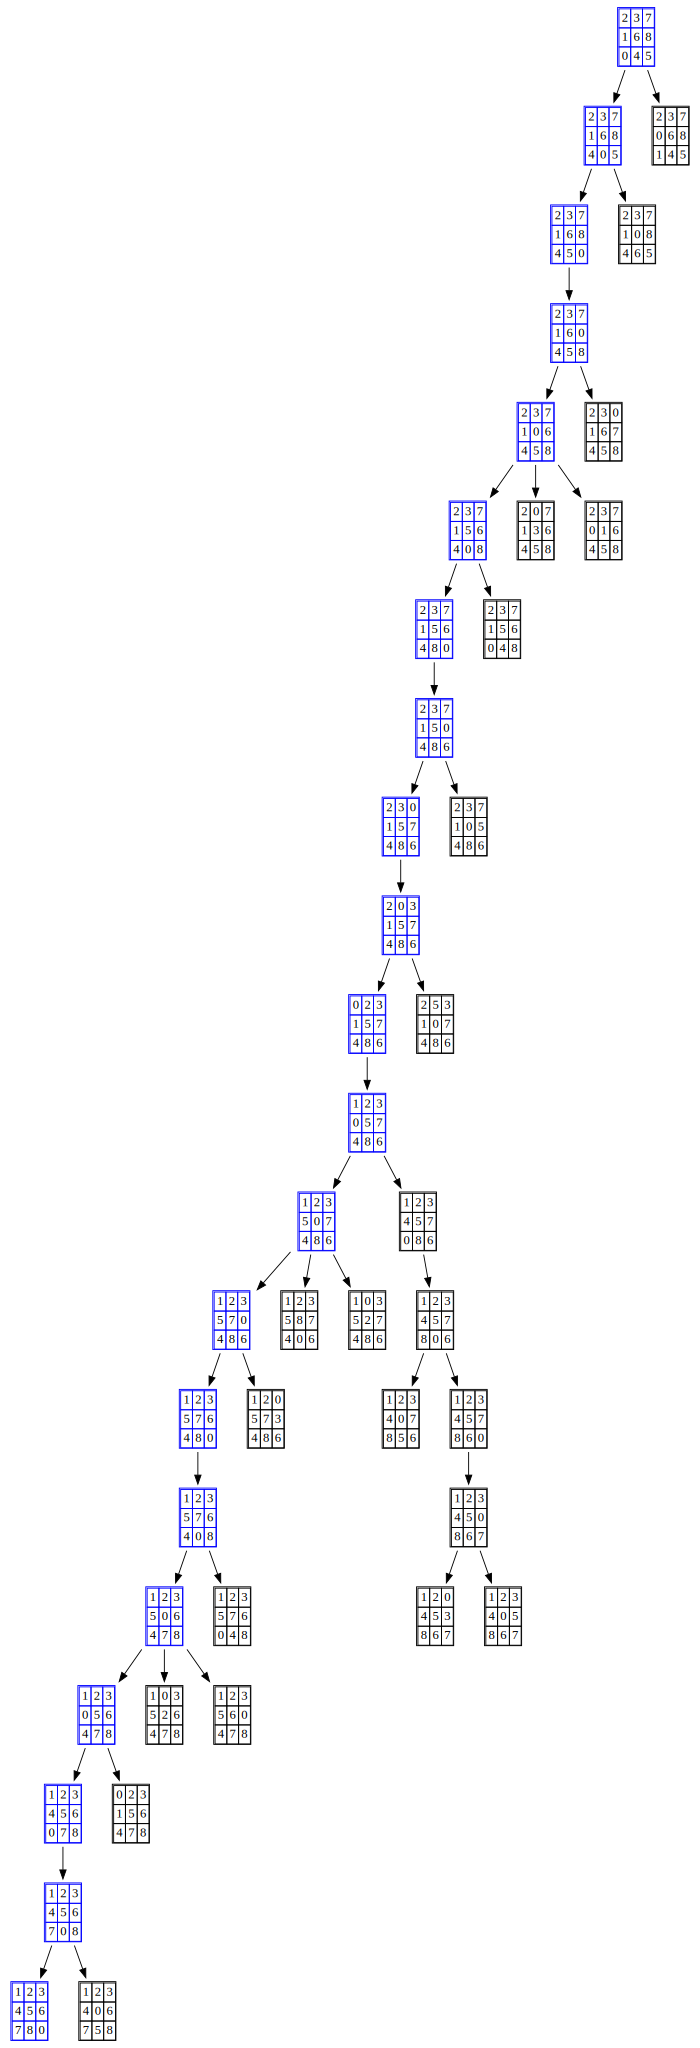

In [7]:
g